In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('bmi.csv')

In [81]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


This data frame contains the following columns:

- Gender : Male / Female
- Height : Number (cm)
- Weight : Number (Kg)
- Index :
   - 0 - Extremely Weak
   - 1 - Weak
   - 2 - Normal
   - 3 - Overweight
   - 4 - Obesity
   - 5 - Extreme Obesity

In [5]:
df.shape

(500, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [8]:
df.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [9]:
df.duplicated().sum()
#As many can have same height weight so it doesnt matter

11

In [10]:
#Now check outliers

In [18]:
#outlier counts
for k, v in df.items():
    if df[k].dtype == 'object':
        continue 
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v < q1 - 1.5 * irq) | (v > q3 + 1.5 * irq)]
    num_outliers = len(v_col)
    print(f"Column '{k}' has {num_outliers} outliers")

Column 'Height' has 0 outliers
Column 'Weight' has 0 outliers
Column 'Index' has 0 outliers


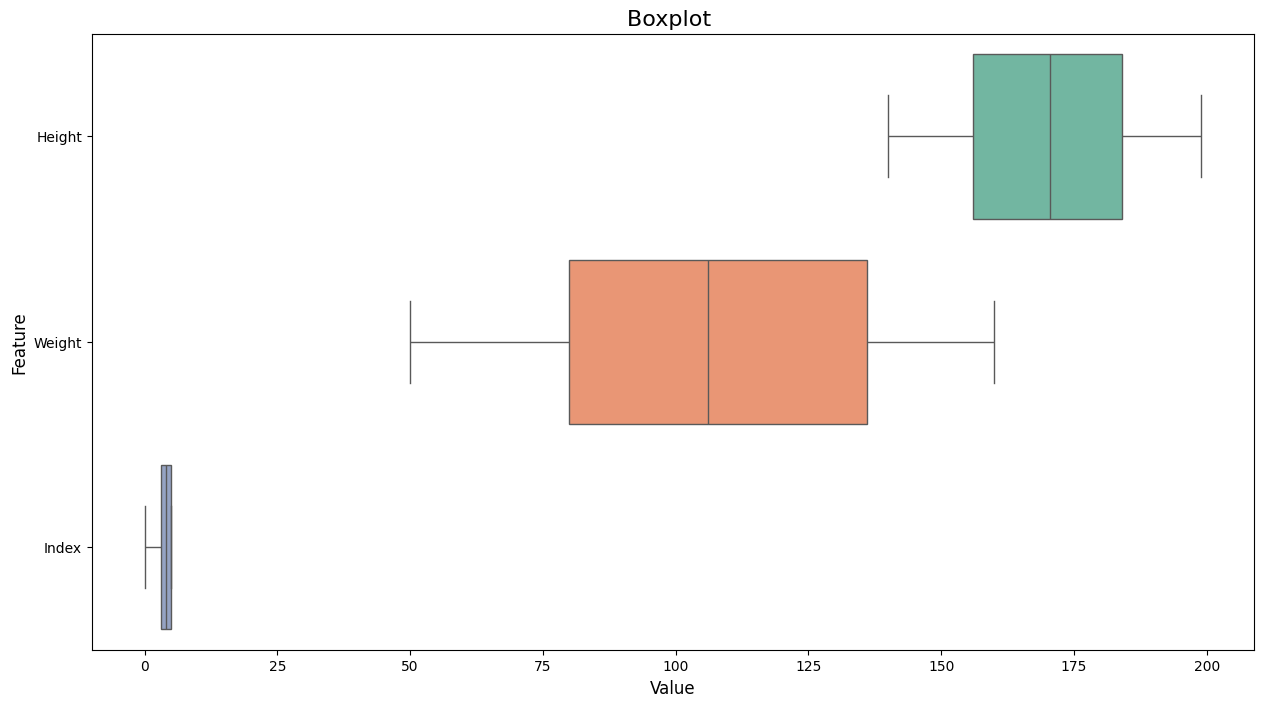

In [24]:
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 8)) 
sns.boxplot(data=df[numeric_cols], orient='h', palette='Set2')
plt.title('Boxplot ', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


In [28]:
print("BMI Category Distribution:")
df['Index'].value_counts()

BMI Category Distribution:


Index
5    198
4    130
2     69
3     68
1     22
0     13
Name: count, dtype: int64

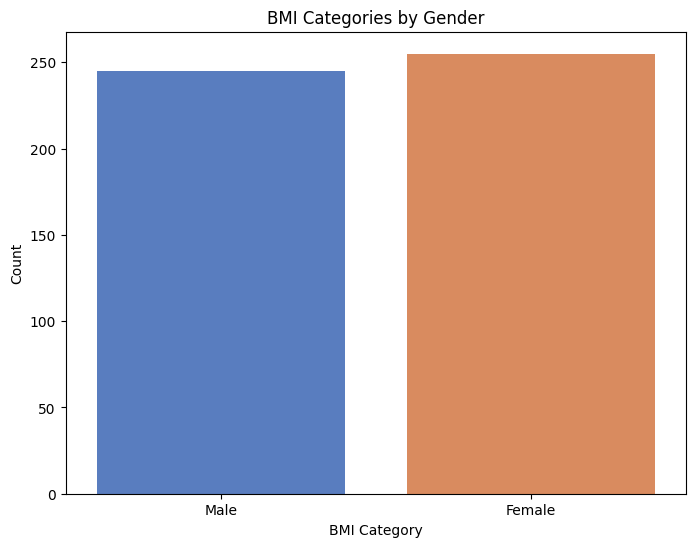

In [43]:
# Count plot showing the distribution of BMI categories by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Gender', palette='muted')
plt.title('BMI Categories by Gender')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Height Vs Weight Data Grouped by Gender')

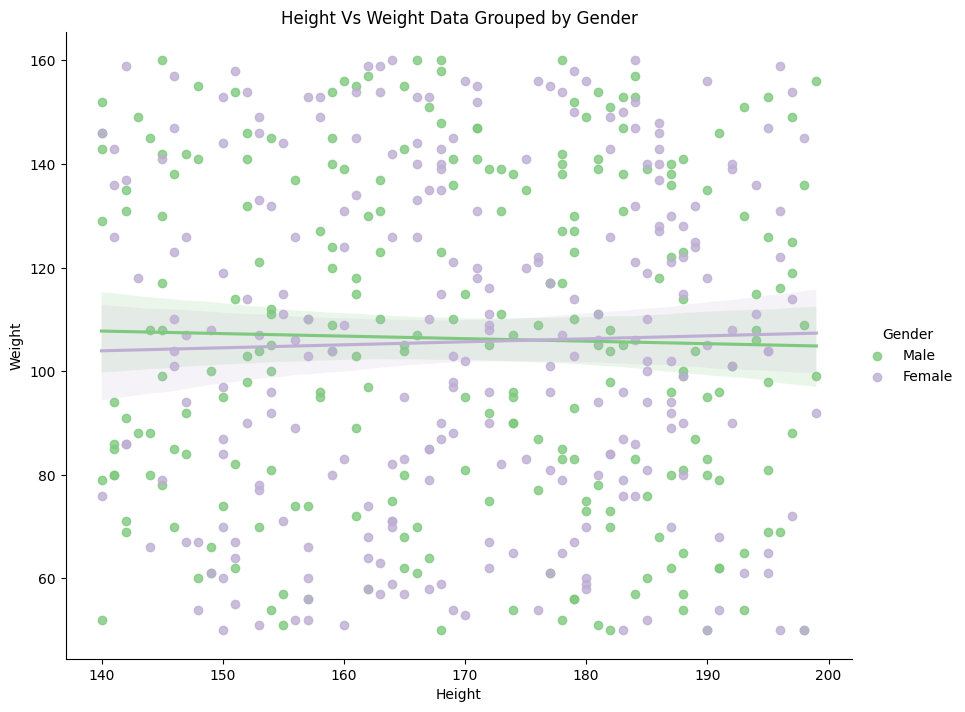

In [58]:
sns.lmplot(x='Height', y='Weight', hue='Gender', data=df,
           fit_reg=True, height=7, aspect=1.25, palette = "Accent")
ax = plt.gca()
ax.set_title("Height Vs Weight Data Grouped by Gender")

The distribution of height vs weight does not follow any trends when categorized by gender.

So, we can hypothesize that gender does not affect the index/BMI value significantly.

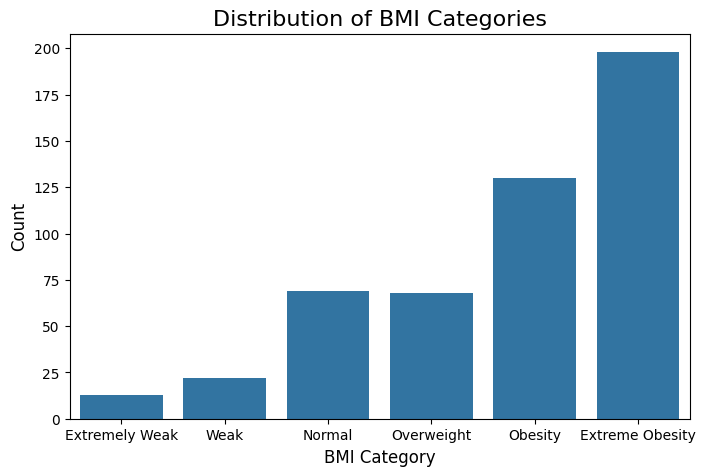

In [34]:
# Plot BMI category distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Index', data=df)
plt.title('Distribution of BMI Categories', fontsize=16)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], 
           labels=['Extremely Weak', 'Weak', 'Normal', 'Overweight', 'Obesity', 'Extreme Obesity'])
plt.show()

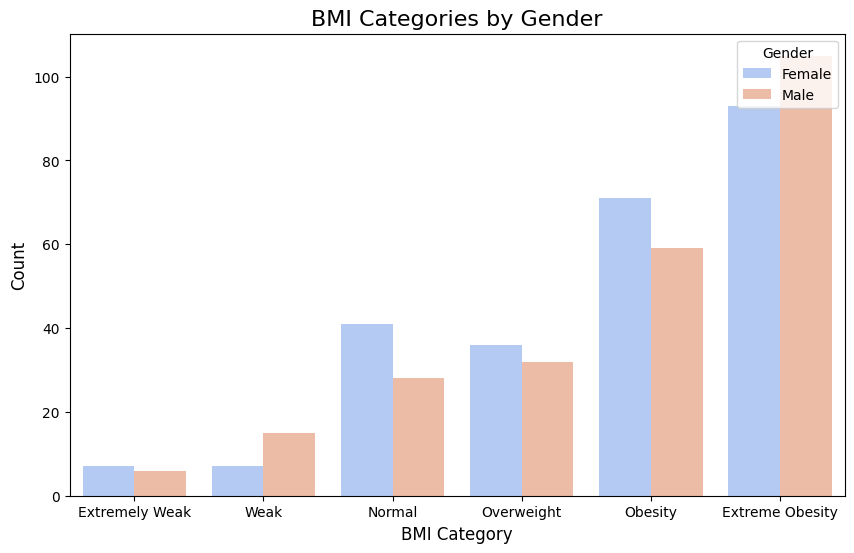

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Index', hue='Gender', data=df, palette='coolwarm')
plt.title('BMI Categories by Gender', fontsize=16)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], 
           labels=['Extremely Weak', 'Weak', 'Normal', 'Overweight', 'Obesity', 'Extreme Obesity'])
plt.legend(title='Gender', loc='upper right')
plt.show()


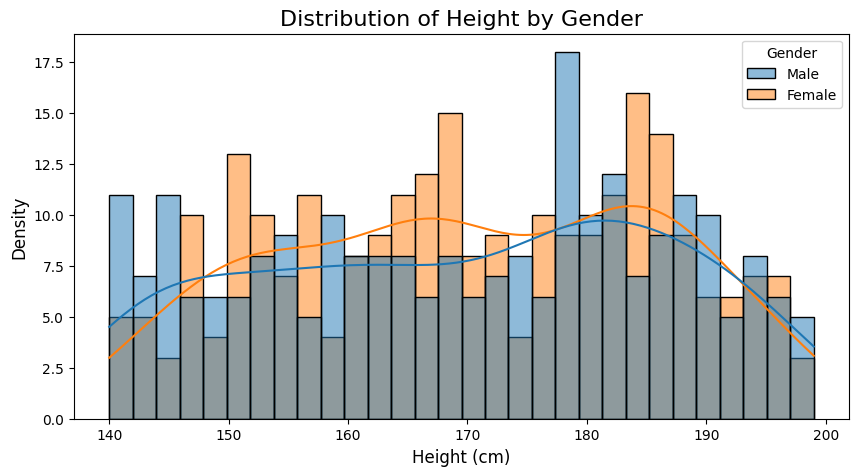

In [38]:
# Distribution of Height by Gender
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Height', hue='Gender', kde=True, bins=30)
plt.title('Distribution of Height by Gender', fontsize=16)
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

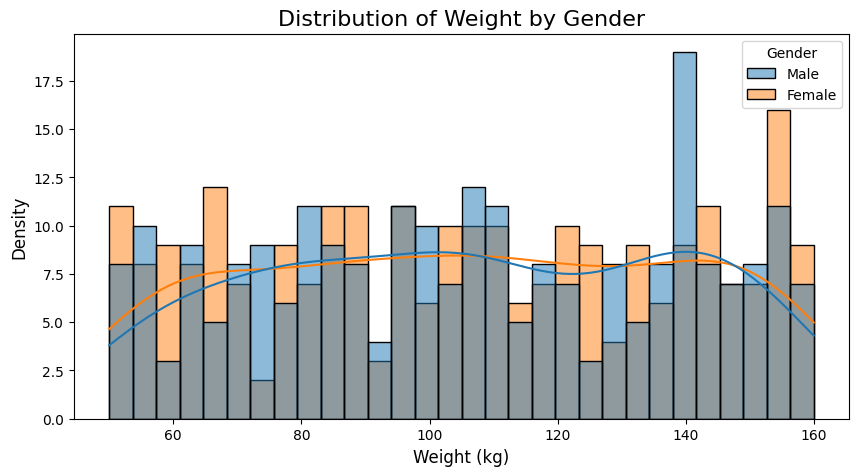

In [37]:
# Distribution of Weight by Gender
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Weight', hue='Gender', kde=True, bins=30)
plt.title('Distribution of Weight by Gender', fontsize=16)
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

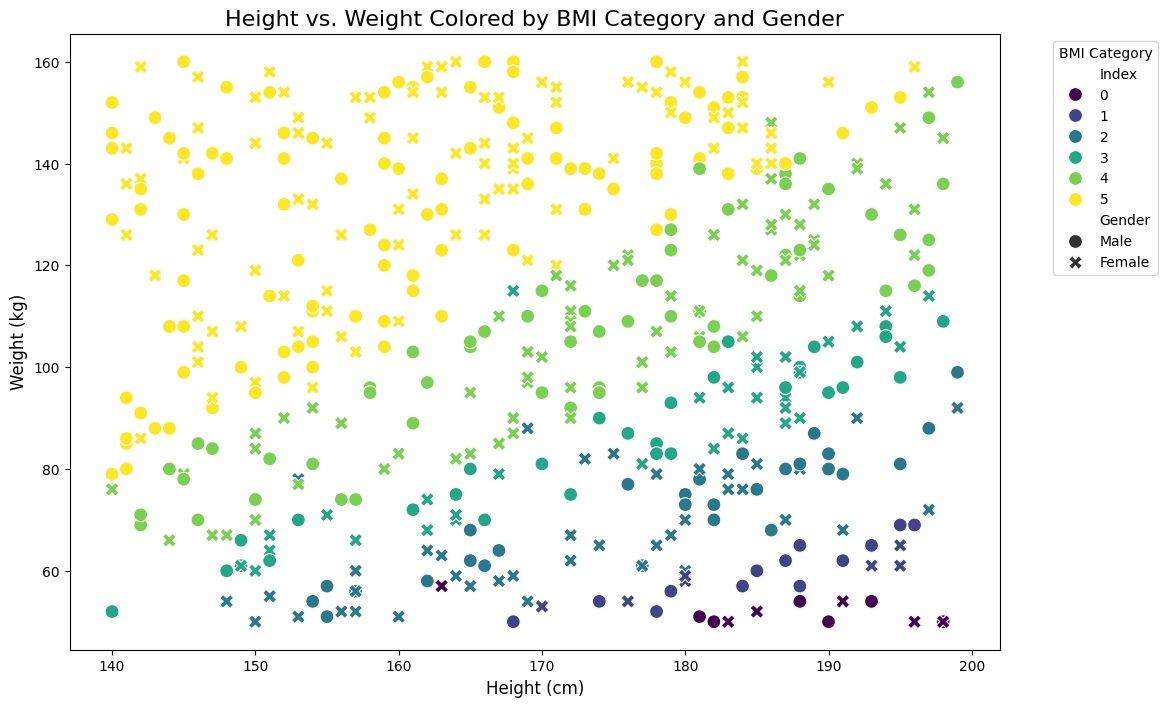

In [40]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Height', y='Weight', hue='Index', style='Gender', palette='viridis', s=100)
plt.title('Height vs. Weight Colored by BMI Category and Gender', fontsize=16)
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)
plt.legend(title='BMI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

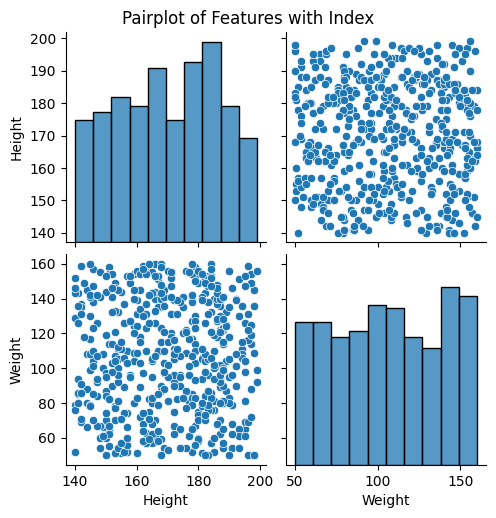

In [44]:
sns.pairplot(df[['Height', 'Weight']], kind='scatter')
plt.suptitle('Pairplot of Features with Index', y=1.02)
plt.show()

In [42]:
summary_stats = df.groupby(['Gender', 'Index'])[['Height', 'Weight']].mean().reset_index()
summary_stats

,Gender,Index,Height,Weight
0,Female,0,186.571429,51.857143
1,Female,1,184.142857,58.714286
2,Female,2,171.682927,66.926829
3,Female,3,176.944444,87.722222
4,Female,4,174.338028,108.070423
5,Female,5,161.569892,135.526882
6,Male,0,188.666667,51.500000
7,Male,1,185.066667,59.733333
8,Male,2,178.035714,72.250000
9,Male,3,174.906250,85.937500


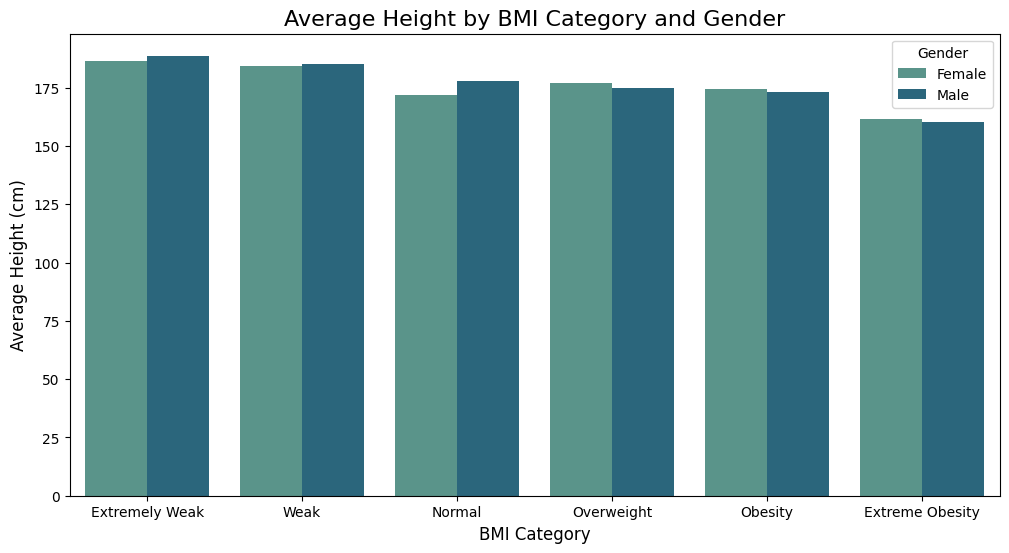

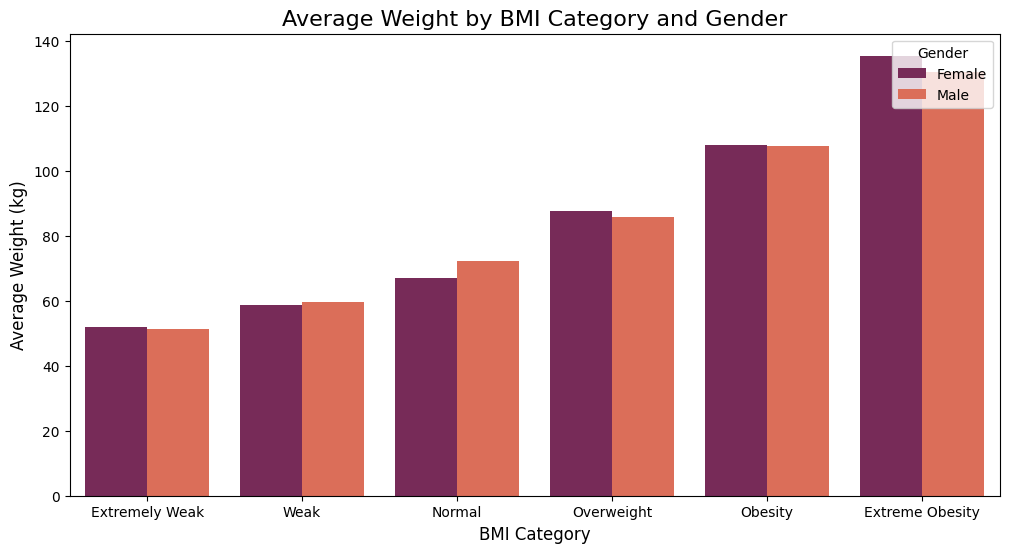

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(12, 6))

# Plot average height by BMI category and gender
sns.barplot(x='Index', y='Height', hue='Gender', data=df, palette='crest', errorbar=None)
plt.title('Average Height by BMI Category and Gender', fontsize=16)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Average Height (cm)', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], 
           labels=['Extremely Weak', 'Weak', 'Normal', 'Overweight', 'Obesity', 'Extreme Obesity'])
plt.legend(title='Gender', loc='upper right')
plt.show()

# Plot average weight by BMI category and gender
plt.figure(figsize=(12, 6))
sns.barplot(x='Index', y='Weight', hue='Gender', data=df, palette='rocket', errorbar=None)
plt.title('Average Weight by BMI Category and Gender', fontsize=16)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Average Weight (kg)', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], 
           labels=['Extremely Weak', 'Weak', 'Normal', 'Overweight', 'Obesity', 'Extreme Obesity'])
plt.legend(title='Gender', loc='upper right')
plt.show()


Text(0.5, 1.0, 'Height Vs Weight Data Grouped by Index')

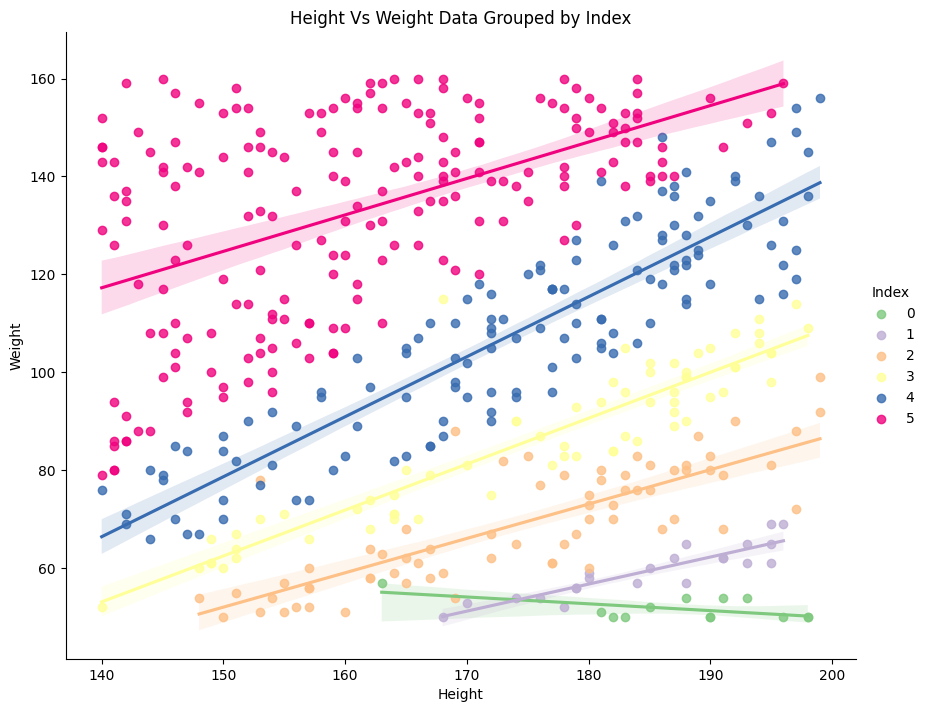

In [56]:
# Trend in Index based on relationship between Height and Weight 
sns.lmplot(x='Height', y='Weight', hue='Index', data=df,
           fit_reg=True, height=7, aspect=1.25, palette='Accent')
ax = plt.gca()
ax.set_title("Height Vs Weight Data Grouped by Index")

We can make out distinct bands in the data based on the index value.

So, there is a general positive correlation between height and weight when categorized by index value.

Now, let us see if there are any discrepencies in the relation when looking at each gender separately.

Text(0.5, 1.0, 'Female Height Vs Weight Data Grouped by Index')

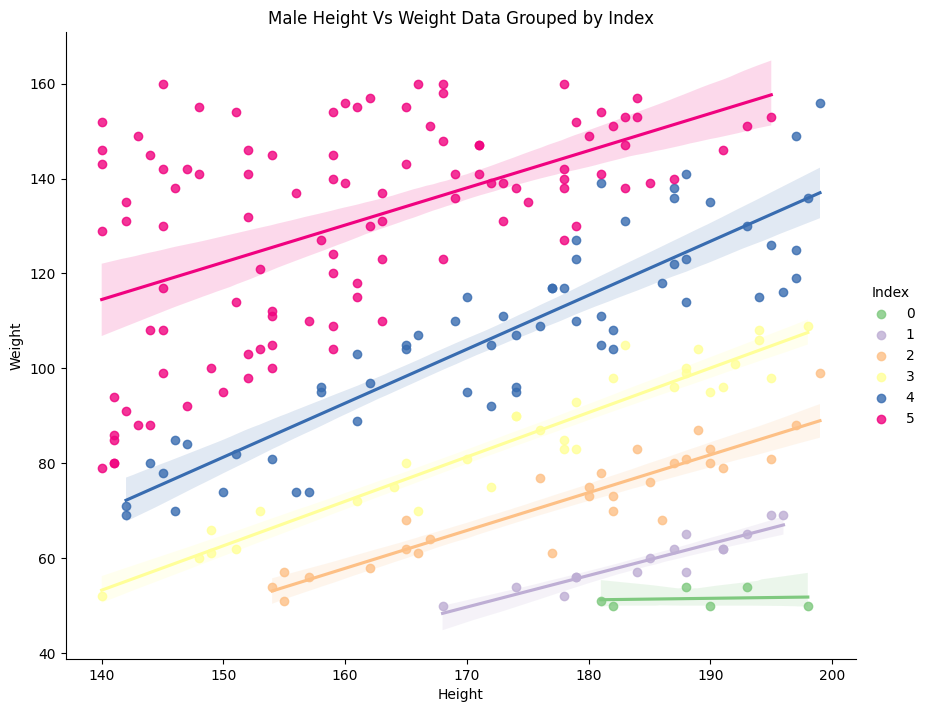

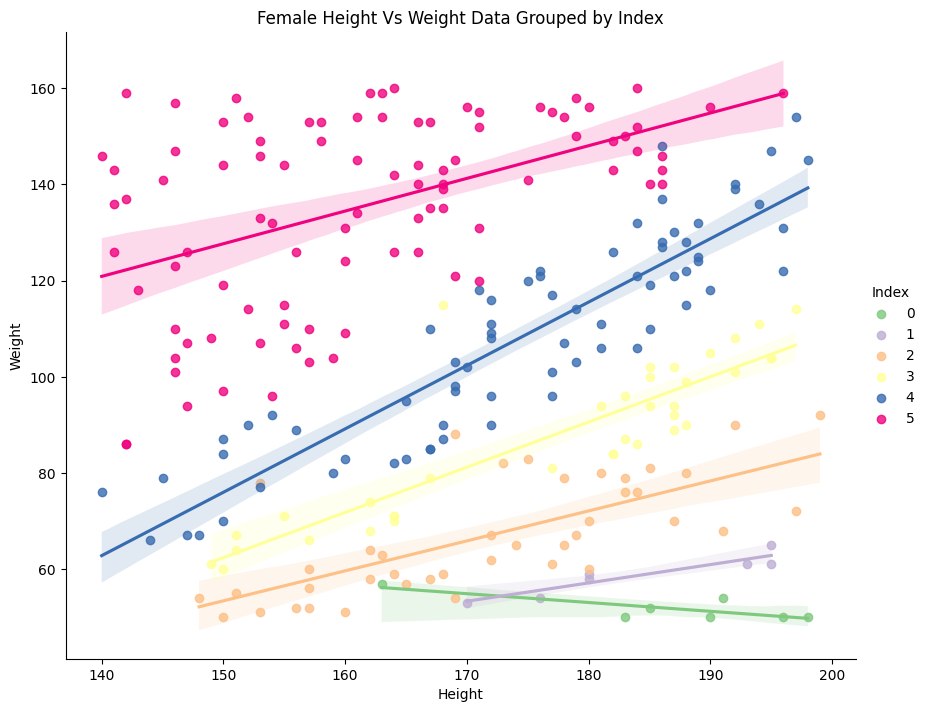

In [60]:
male_data = df[df['Gender']=='Male']
female_data = df[df['Gender']=='Female']
sns.lmplot(x='Height', y='Weight', hue='Index', data=male_data,
           fit_reg=True, height=7, aspect=1.25,palette='Accent')
ax = plt.gca()
ax.set_title("Male Height Vs Weight Data Grouped by Index")

sns.lmplot(x='Height', y='Weight', hue='Index', data=female_data,
           fit_reg=True, height=7, aspect=1.25,palette='Accent')
ax = plt.gca()
ax.set_title("Female Height Vs Weight Data Grouped by Index")

In [70]:
df_corr=df[['Height','Weight','Index']]

In [72]:
df_corr.head()

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3


In [74]:
df_corr.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


<Axes: >

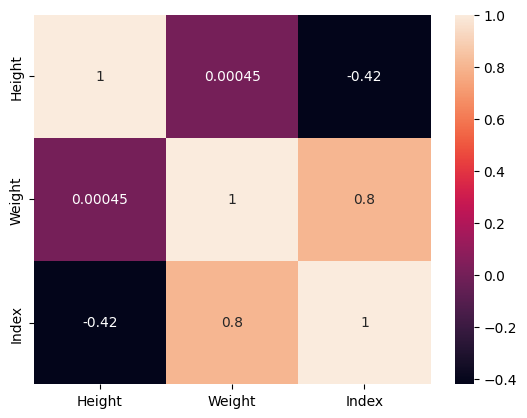

In [75]:
sns.heatmap(df_corr.corr(), annot=True)

<Axes: >

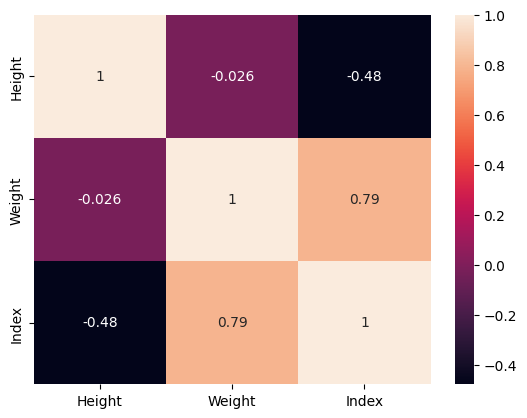

In [82]:
#genderwise heatmap==>male first
male_data = df[df['Gender']=='Male']
male_data_corr =male_data[['Height','Weight','Index']]
sns.heatmap(male_data_corr.corr(), annot=True)

<Axes: >

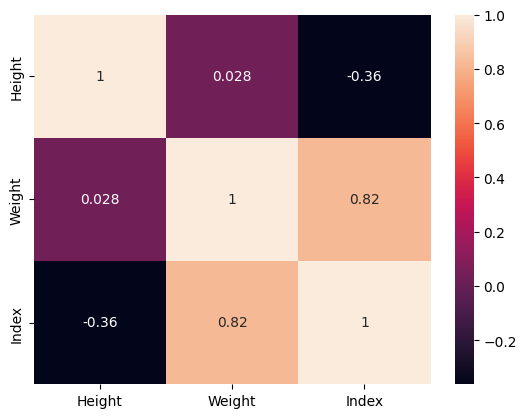

In [83]:
female_data = df[df['Gender']=='Female']
female_data_corr =female_data[['Height','Weight','Index']]
sns.heatmap(female_data_corr.corr(), annot=True)

Knowing gender is a categorical value (Male/Female based on the data description) we need to encode the data for Gender to make it useable.

In [97]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
#male -1
#female - 0
#alphabetically

In [98]:
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [99]:
df['Index'].value_counts()

Index
5    198
4    130
2     69
3     68
1     22
0     13
Name: count, dtype: int64

Imbalanced target column, we can use strategies like
- Oversampling
- Undersampling
- SMOTE

Comparing results foreach sampling in logistic regression to check which one will be suitable for our problem

### OVERSAMPLIG

In [190]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [109]:
X =df.drop('Index',axis =1)
y=df['Index']
print(X.shape)
print(y.shape)

(500, 3)
(500,)


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

print("Resampled class distribution:\n", pd.Series(y_resampled).value_counts())
model_over = LogisticRegression(random_state=42)
model_over.fit(X_resampled, y_resampled)

y_pred_over = model_over.predict(X_test)
print("Random Oversampling")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_over))
print(classification_report(y_test, y_pred_over, zero_division=0))

Resampled class distribution:
 Index
4    159
5    159
2    159
3    159
1    159
0    159
Name: count, dtype: int64
Random Oversampling
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  3 15  0  0  0]
 [ 0  0  2  6  0  0]
 [ 0  0  0  9 18  3]
 [ 0  0  0  0  6 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.57      1.00      0.73         4
           2       0.88      0.83      0.86        18
           3       0.40      0.75      0.52         8
           4       0.75      0.60      0.67        30
           5       0.92      0.85      0.88        39

    accuracy                           0.77       100
   macro avg       0.75      0.84      0.78       100
weighted avg       0.81      0.77      0.78       100



C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

print("Resampled class distribution:\n", pd.Series(y_resampled).value_counts())

model_under = LogisticRegression(random_state=42)
model_under.fit(X_resampled, y_resampled)
y_pred_under = model_under.predict(X_test)

print("Random Undersampling")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_under))
print(classification_report(y_test, y_pred_under, zero_division=0))

Resampled class distribution:
 Index
0    12
1    12
2    12
3    12
4    12
5    12
Name: count, dtype: int64
Random Undersampling
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  3 15  0  0  0]
 [ 0  0  3  5  0  0]
 [ 0  0  2  7 15  6]
 [ 0  0  0  0  5 34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.57      1.00      0.73         4
           2       0.75      0.83      0.79        18
           3       0.42      0.62      0.50         8
           4       0.75      0.50      0.60        30
           5       0.85      0.87      0.86        39

    accuracy                           0.74       100
   macro avg       0.72      0.81      0.75       100
weighted avg       0.76      0.74      0.74       100



C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Resampled class distribution:\n", pd.Series(y_resampled).value_counts())
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_resampled, y_resampled)

y_pred_smote = model_smote.predict(X_test)
print("SMOTE")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote, zero_division=0))

Resampled class distribution:
 Index
4    159
5    159
2    159
3    159
1    159
0    159
Name: count, dtype: int64
SMOTE
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  3  1  0  0  0]
 [ 0  2 16  0  0  0]
 [ 0  0  2  6  0  0]
 [ 0  0  0  8 19  3]
 [ 0  0  0  0  7 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.60      0.75      0.67         4
           2       0.84      0.89      0.86        18
           3       0.43      0.75      0.55         8
           4       0.73      0.63      0.68        30
           5       0.91      0.82      0.86        39

    accuracy                           0.77       100
   macro avg       0.75      0.81      0.77       100
weighted avg       0.80      0.77      0.78       100



C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
def get_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    return {
        'Model': model_name,
        'Accuracy': report['accuracy'],
        'F1-Score (Weighted)': report['weighted avg']['f1-score'],
        'Precision (Weighted)': report['weighted avg']['precision'],
        'Recall (Weighted)': report['weighted avg']['recall']
    }

# Collect metrics for all models
results = [
    get_metrics(y_test, y_pred_over, 'Random Oversampling'),
    get_metrics(y_test, y_pred_under, 'Random Undersampling'),
    get_metrics(y_test, y_pred_smote, 'SMOTE')
]

df_results_sampling = pd.DataFrame(results)
df_results_sampling

,Model,Accuracy,F1-Score (Weighted),Precision (Weighted),Recall (Weighted)
0,Random Oversampling,0.77,0.778316,0.806181,0.77
1,Random Undersampling,0.74,0.736892,0.757690,0.74
2,SMOTE,0.77,0.776847,0.795667,0.77


- SMOTE provides a balanced approach with metrics close to Random Oversampling, but slightly lower recall.
- It prevents overfitting (compared to Random Oversampling) by creating synthetic data instead of duplicating instances, which might explain its stable performance.

- As a result wego further with SMOTE
- Also, we need to standardise height and weight during building models to yield better results

### LOGISTIC REGRESSION

We will be creating 3 models of logistic regression with
1. Generalised Dataset which we have
2. Male Dataset, i.e, only the one with Gender Male
3. Female Dataset, i.e, only the one with Gender Female
SMOTE will be used as a Sampling method
StandardScaler will be used for standardisation of height and weight

Firstly, let us divide our dataset into training and testing set for all the above 3 cases

In [126]:
#GENERAL
X =df.drop('Index',axis =1)
y=df['Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
print("X train",X_train.shape)
print("y train",y_train.shape)
print("X test",X_test.shape)
print("y test",y_test.shape)

X train (400, 3)
y train (400,)
X test (100, 3)
y test (100,)


In [129]:
#CREATING MALE AND FEMALE DATAFRAME
df_male = df[df['Gender'] == 1]  # Assuming 0 represents male
df_female = df[df['Gender'] == 0]  # Assuming 1 represents female

In [130]:
X_male = df_male.drop('Index',axis=1)
y_male = df_male['Index']
print(X_male.shape)
print(y_male.shape)

(245, 3)
(245,)


In [131]:
#female
X_female = df_female.drop('Index',axis=1)
y_female = df_female['Index']
print(X_female.shape)
print(y_female.shape)

(255, 3)
(255,)


In [149]:
#LOGISTIC REGRESSION

results_logistic = []

def train_and_evaluate(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #fixing error as some case, the minimum index can be less than 5 so,
    minority_class_size = min(y_train.value_counts())
    k_neighbors = min(5, minority_class_size - 1)  # Ensure k_neighbors < class size

    # Apply SMOTE with adjusted k_neighbors
    smote = SMOTE(random_state=42, k_neighbors=max(1, k_neighbors))  
    X_train, y_train = smote.fit_resample(X_train, y_train)
   
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"\nResults for {dataset_name} Dataset:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    # Store Results
    results_logistic.append({
        'Dataset': dataset_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })



In [150]:
#General Model Logistic Regression
train_and_evaluate(X,y, "General_Dataset_Without_Gender_Split") 


Results for General_Dataset_Without_Gender_Split Dataset:
Accuracy: 0.87
Precision: 0.6574584651674434
Recall: 0.746545584045584
F1 Score: 0.6842712842712843
Confusion Matrix:
 [[ 0  1  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  2 16  0  0  0]
 [ 0  0  1  7  0  0]
 [ 0  0  0  6 23  1]
 [ 0  0  0  0  2 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.57      1.00      0.73         4
           2       0.94      0.89      0.91        18
           3       0.54      0.88      0.67         8
           4       0.92      0.77      0.84        30
           5       0.97      0.95      0.96        39

    accuracy                           0.87       100
   macro avg       0.66      0.75      0.68       100
weighted avg       0.89      0.87      0.87       100



In [151]:
# Model with Male gender only
train_and_evaluate(X_male,y_male, "Male")


Results for Male Dataset:
Accuracy: 0.9387755102040817
Precision: 0.8833333333333333
Recall: 0.9401960784313727
F1 Score: 0.8954368243841927
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 1  4  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0  9  0  0]
 [ 0  0  0  1  9  0]
 [ 0  0  0  0  1 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         7
           3       0.90      1.00      0.95         9
           4       0.90      0.90      0.90        10
           5       1.00      0.94      0.97        17

    accuracy                           0.94        49
   macro avg       0.88      0.94      0.90        49
weighted avg       0.95      0.94      0.94        49



In [152]:
#Model with female gender only
train_and_evaluate(X_female,y_female, "Female")


Results for Female Dataset:
Accuracy: 0.8431372549019608
Precision: 0.6181318681318682
Recall: 0.6
F1 Score: 0.6045701357466063
Confusion Matrix:
 [[ 0  0  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 0  1  3  1  1  0]
 [ 0  0  4  6  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      0.50      0.50         2
           2       0.43      0.50      0.46         6
           3       0.86      0.60      0.71        10
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00        21

    accuracy                           0.84        51
   macro avg       0.62      0.60      0.60        51
weighted avg       0.87      0.84      0.85        51



C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [153]:
#Comparison between all models
df_results_logistic_model = pd.DataFrame(results_logistic)
print("\nComparison of Results For Logistic Regression:")
df_results_logistic_model


Comparison of Results For Logistic Regression:


,Dataset,Accuracy,Precision,Recall,F1 Score
0,General_Dataset_Without_Gender_Split,0.870000,0.657458,0.746546,0.684271
1,Male,0.938776,0.883333,0.940196,0.895437
2,Female,0.843137,0.618132,0.600000,0.604570


###  K-Nearest Neighbors (KNN)

In [170]:
results_knn = []

def train_and_evaluate(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    minority_class_size = min(y_train.value_counts())
    k_neighbors = min(5, minority_class_size - 1) 

    smote = SMOTE(random_state=42, k_neighbors=max(1, k_neighbors))
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # K-Nearest Neighbors (KNN) - Initially with K=5
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"\nResults for {dataset_name} Dataset:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    results_knn.append({
        'Dataset': dataset_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })



In [171]:
#KNN FOR GENERAL
train_and_evaluate(X,y, "General_Without_Gender_Split")


Results for General_Without_Gender_Split Dataset:
Accuracy: 0.85
Precision: 0.8191415945595512
Recall: 0.8941239316239317
F1 Score: 0.8431457431457431
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  2 15  1  0  0]
 [ 0  0  1  7  0  0]
 [ 0  0  1  5 22  2]
 [ 0  0  0  0  3 36]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.67      1.00      0.80         4
           2       0.88      0.83      0.86        18
           3       0.54      0.88      0.67         8
           4       0.88      0.73      0.80        30
           5       0.95      0.92      0.94        39

    accuracy                           0.85       100
   macro avg       0.82      0.89      0.84       100
weighted avg       0.87      0.85      0.85       100



In [172]:
#KNN FOR MALE
train_and_evaluate(X_male,y_male, "Male")


Results for Male Dataset:
Accuracy: 0.9183673469387755
Precision: 0.8680555555555555
Recall: 0.9198257080610022
F1 Score: 0.8737794612794613
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 1  4  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  1  7  1  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  1 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.80      0.89         5
           2       0.88      1.00      0.93         7
           3       1.00      0.78      0.88         9
           4       0.83      1.00      0.91        10
           5       1.00      0.94      0.97        17

    accuracy                           0.92        49
   macro avg       0.87      0.92      0.87        49
weighted avg       0.94      0.92      0.92        49



In [173]:
#knn for female
train_and_evaluate(X_female,y_female, "Female")


Results for Female Dataset:
Accuracy: 0.8823529411764706
Precision: 0.8928571428571429
Recall: 0.8771428571428572
F1 Score: 0.8703966764942376
Confusion Matrix:
 [[ 2  0  0  0  0]
 [ 0  5  0  1  0]
 [ 0  2  6  2  0]
 [ 0  0  0 12  0]
 [ 0  0  0  1 20]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.71      0.83      0.77         6
           3       1.00      0.60      0.75        10
           4       0.75      1.00      0.86        12
           5       1.00      0.95      0.98        21

    accuracy                           0.88        51
   macro avg       0.89      0.88      0.87        51
weighted avg       0.91      0.88      0.88        51



In [174]:
df_results_knn = pd.DataFrame(results_knn)
print("\nComparison of Results For KNN Model:")
df_results_knn


Comparison of Results For KNN Model:


,Dataset,Accuracy,Precision,Recall,F1 Score
0,General_Without_Gender_Split,0.850000,0.819142,0.894124,0.843146
1,Male,0.918367,0.868056,0.919826,0.873779
2,Female,0.882353,0.892857,0.877143,0.870397


- Since wehave started kwith initiallly 5, let us find best value of k which has the lowest error rate.
- We will then again use the best value of k and run knn model for all 3 cases again

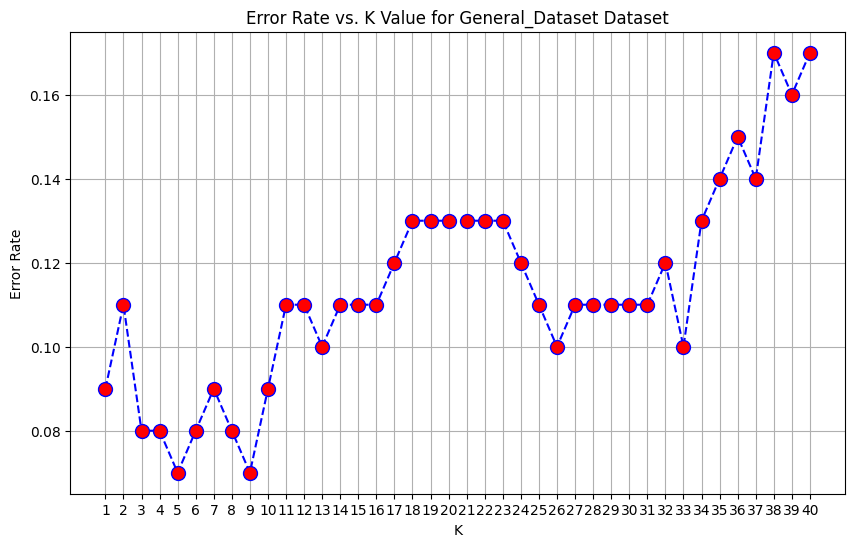

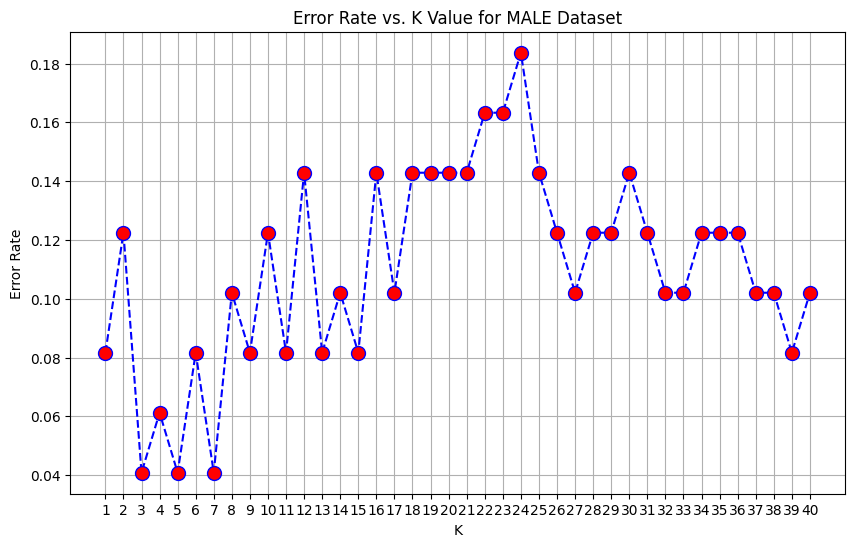

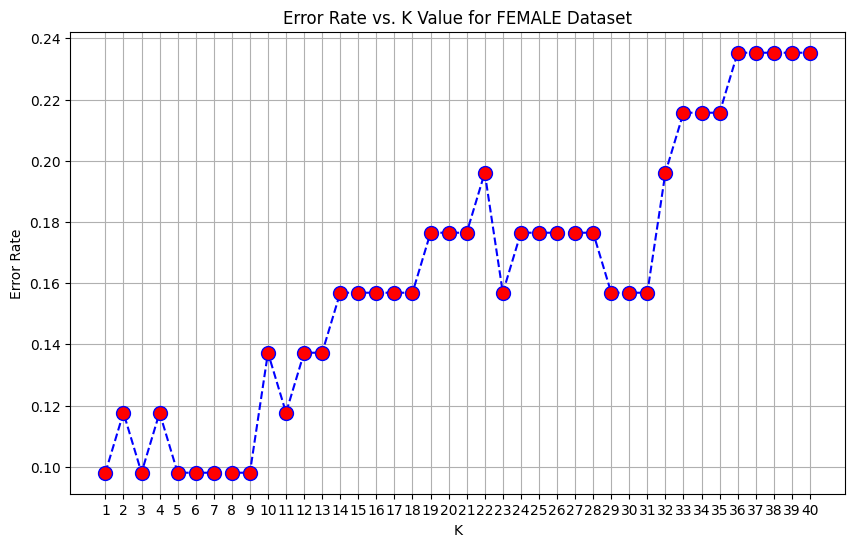

In [175]:

def evaluate_knn_error_rate(X,y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    minority_class_size = min(y_train.value_counts())
    k_neighbors = min(5, minority_class_size - 1)  

    smote = SMOTE(random_state=42, k_neighbors=max(1, k_neighbors))  # Avoid k_neighbors=0
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    error_rate = []

    # Will try K values from 1 to 40
    for i in range(1, 41):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title(f'Error Rate vs. K Value for {dataset_name} Dataset')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.xticks(np.arange(1, 41, 1))  
    plt.grid()
    plt.show()

# For combined dataset 
evaluate_knn_error_rate(X,y, "General_Dataset")

# For male dataset
evaluate_knn_error_rate(X_male, y_male, "MALE")

# For female dataset
evaluate_knn_error_rate(X_female,y_female, "FEMALE")



- We can see lowest error rate
- For General the lowest error rate with k = 5
- For Male the lowest error rate with k = 3
- For Female the lowest error rate with k = 1

In [176]:
results_best_knn = []

def train_and_evaluate(X, y, dataset_name,k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    minority_class_size = min(y_train.value_counts())
    k_neighbors = min(5, minority_class_size - 1) 

    smote = SMOTE(random_state=42, k_neighbors=max(1, k_neighbors))  
    X_train, y_train = smote.fit_resample(X_train, y_train)
  
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"\nResults for {dataset_name} Dataset:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    results_best_knn.append({
        'Dataset': dataset_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })


In [177]:
#KNN for genral with k=5
train_and_evaluate(X,y, "General_Without_Gender_Split",5)


Results for General_Without_Gender_Split Dataset:
Accuracy: 0.85
Precision: 0.8191415945595512
Recall: 0.8941239316239317
F1 Score: 0.8431457431457431
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  2 15  1  0  0]
 [ 0  0  1  7  0  0]
 [ 0  0  1  5 22  2]
 [ 0  0  0  0  3 36]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.67      1.00      0.80         4
           2       0.88      0.83      0.86        18
           3       0.54      0.88      0.67         8
           4       0.88      0.73      0.80        30
           5       0.95      0.92      0.94        39

    accuracy                           0.85       100
   macro avg       0.82      0.89      0.84       100
weighted avg       0.87      0.85      0.85       100



In [178]:
# KNN for male with k = 3
train_and_evaluate(X_male,y_male, "Male",3)



Results for Male Dataset:
Accuracy: 0.9387755102040817
Precision: 0.8888888888888888
Recall: 0.9383442265795207
F1 Score: 0.8959199841552783
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 1  4  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0  8  1  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  1 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         7
           3       1.00      0.89      0.94         9
           4       0.83      1.00      0.91        10
           5       1.00      0.94      0.97        17

    accuracy                           0.94        49
   macro avg       0.89      0.94      0.90        49
weighted avg       0.96      0.94      0.94        49



In [179]:
#KNN for female with k = 1
train_and_evaluate(X_female,y_female, "Female",1)


Results for Female Dataset:
Accuracy: 0.9019607843137255
Precision: 0.8988095238095237
Recall: 0.8899999999999999
F1 Score: 0.8914529914529915
Confusion Matrix:
 [[ 2  0  0  0  0]
 [ 0  5  0  1  0]
 [ 0  1  7  2  0]
 [ 0  0  1 11  0]
 [ 0  0  0  0 21]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.83      0.83      0.83         6
           3       0.88      0.70      0.78        10
           4       0.79      0.92      0.85        12
           5       1.00      1.00      1.00        21

    accuracy                           0.90        51
   macro avg       0.90      0.89      0.89        51
weighted avg       0.91      0.90      0.90        51



In [180]:
df_results_best_knn = pd.DataFrame(results_best_knn)

print("\nComparison of Results For KNN with best k value:")
df_results_best_knn


Comparison of Results For KNN with best k value:


,Dataset,Accuracy,Precision,Recall,F1 Score
0,General_Without_Gender_Split,0.850000,0.819142,0.894124,0.843146
1,Male,0.938776,0.888889,0.938344,0.895920
2,Female,0.901961,0.898810,0.890000,0.891453


- The accuracy for the general dataset did not change after tuning 𝑘, indicating that the overall model performance remained stable with k = 5
- For male, the accuracy improved from 0.918367 to 0.938776 with the best k = 3. The precision and recall also improved, which suggests that the model is better at identifying male instances with fewer false positives and negatives.
- The accuracy improved from 0.882353 to 0.901961 with the best k=1. Precision and recall improved, showing that the model is also more effective for females with this lower k


### Support Vector Machine (SVM)

In [183]:
results_svm = []

def train_and_evaluate_svm(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    minority_class_size = min(y_train.value_counts())
    k_neighbors = min(5, minority_class_size - 1) 

    smote = SMOTE(random_state=42, k_neighbors=max(1, k_neighbors))
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Support Vector Machine (SVM)
    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"\nResults for {dataset_name} Dataset:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    results_svm.append({
        'Dataset': dataset_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })


In [184]:
#KNN FOR GENERAL
train_and_evaluate_svm(X,y, "General_Without_Gender_Split")


Results for General_Without_Gender_Split Dataset:
Accuracy: 0.9
Precision: 0.6891078270388616
Recall: 0.7797720797720799
F1 Score: 0.7183008550107255
Confusion Matrix:
 [[ 0  1  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  2 16  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  4 26  0]
 [ 0  0  0  0  3 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.57      1.00      0.73         4
           2       1.00      0.89      0.94        18
           3       0.67      1.00      0.80         8
           4       0.90      0.87      0.88        30
           5       1.00      0.92      0.96        39

    accuracy                           0.90       100
   macro avg       0.69      0.78      0.72       100
weighted avg       0.92      0.90      0.90       100



In [185]:
#KNN FOR Male
train_and_evaluate_svm(X_male,y_male, "Male")


Results for Male Dataset:
Accuracy: 0.9183673469387755
Precision: 0.8606481481481482
Recall: 0.921677559912854
F1 Score: 0.8745791245791246
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 1  4  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  1  8  0  0]
 [ 0  0  0  1  9  0]
 [ 0  0  0  0  1 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.80      0.89         5
           2       0.88      1.00      0.93         7
           3       0.89      0.89      0.89         9
           4       0.90      0.90      0.90        10
           5       1.00      0.94      0.97        17

    accuracy                           0.92        49
   macro avg       0.86      0.92      0.87        49
weighted avg       0.93      0.92      0.92        49



In [186]:
train_and_evaluate_svm(X_female,y_female, "Female")


Results for Female Dataset:
Accuracy: 0.9019607843137255
Precision: 0.8964285714285716
Recall: 0.8971428571428571
F1 Score: 0.8873003610449809
Confusion Matrix:
 [[ 2  0  0  0  0]
 [ 0  5  0  1  0]
 [ 0  3  7  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  1 20]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.62      0.83      0.71         6
           3       1.00      0.70      0.82        10
           4       0.86      1.00      0.92        12
           5       1.00      0.95      0.98        21

    accuracy                           0.90        51
   macro avg       0.90      0.90      0.89        51
weighted avg       0.92      0.90      0.90        51



In [187]:
df_results_svm = pd.DataFrame(results_svm)
print("\nComparison of Results For SVM:")
df_results_svm



Comparison of Results For SVM:


,Dataset,Accuracy,Precision,Recall,F1 Score
0,General_Without_Gender_Split,0.900000,0.689108,0.779772,0.718301
1,Male,0.918367,0.860648,0.921678,0.874579
2,Female,0.901961,0.896429,0.897143,0.887300


Let us try to improve results of svm with hyperparameter tuning

In [188]:
grid_search_results = []

def svm_grid_search(X, y, dataset_name, param_grid=None):
    # Default parameter grid if none provided
    if param_grid is None:
        param_grid = {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly'],
            'degree': [2, 3, 4],
            'gamma': ['scale', 'auto']
        }

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    minority_class_size = min(y_train.value_counts())
    k_neighbors = min(5, minority_class_size - 1) 

    smote = SMOTE(random_state=42, k_neighbors=max(1, k_neighbors))  # Avoid k_neighbors=0
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    svm = SVC()
    #for hyperparameter tuning
    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    predictions = best_model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, predictions)

    print(f"\nResults for {dataset_name} Dataset:")
    print(f"Best Parameters: {best_params}")
    print(f"Best Cross-validated Score: {best_score:.4f}")
    print(f"Test Set Accuracy: {test_accuracy:.4f}")

    grid_search_results.append({
        'Dataset': dataset_name,
        'Best Parameters': best_params,
        'Cross-validated Score': best_score,
        'Test Set Accuracy': test_accuracy
    })


In [191]:

svm_grid_search(X, y, "General_Without_Gender_Split")
svm_grid_search(X_male, y_male, "Male")
svm_grid_search(X_female, y_female, "Female")

df_grid_results = pd.DataFrame(grid_search_results)
print("\nComparison of GridSearchCV Results with hyperparameter tuning:")
df_grid_results


Fitting 5 folds for each of 72 candidates, totalling 360 fits

Results for General_Without_Gender_Split Dataset:
Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validated Score: 0.9466
Test Set Accuracy: 0.9600
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Results for Male Dataset:
Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-validated Score: 0.9830
Test Set Accuracy: 1.0000
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Results for Female Dataset:
Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validated Score: 0.9376
Test Set Accuracy: 0.9216

Comparison of GridSearchCV Results with hyperparameter tuning:


,Dataset,Best Parameters,Cross-validated Score,Test Set Accuracy
0,General_Without_Gender_Split,"{'C': 100, 'degree': 2, 'gamma': 'scale', 'ker...",0.946558,0.960000
1,Male,"{'C': 100, 'degree': 2, 'gamma': 'scale', 'ker...",0.983001,1.000000
2,Female,"{'C': 100, 'degree': 2, 'gamma': 'scale', 'ker...",0.937557,0.921569


For general dataset,
- Cross-validated Score => 0.946558 indicates strong performance across folds in cross validation.
- Test Set Accuracy => 0.960000 shows that the model generalizes well to unseen data.
For male dataset,
- Cross-validated score of 0.983001, which is very high, indicating excellent performance during validation.
- Test Set Accuracy => 1.000000 means the model perfectly classified all male instances in the test set, suggesting it effectively captures the patterns for this group.
For female dataset,
- Cross-validated score of 0.937557, which is still strong but lower than that for males and the general dataset.
- Test Set Accuracy = > 0.921569 indicates that the model performed slightly less effectively on the female subset compared to males and the general dataset.

Thus, the hyperparameter tuning for SVC has yielded strong results across all categories, with a notable perfect score for the male dataset.
For all it was,
- |Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}